In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import seed
seed(1)
import tensorflow 
tensorflow.keras.__version__
import numpy as np
import pandas as pd

In [6]:
# Read the csv file into a pandas DataFrame from the files' path

blackJack = pd.read_csv('C://Users//csuch//OneDrive//Desktop//Challenges//BlackJack_project//cs_blackjack project//BlackJack_Machine_learning//BlackJack.csv')
blackJack.head(12)

,Unnamed: 0,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
5,5,Player6,6,1,8,10,0,25,10,8,...,0,0,18,nowin,Loss,Bust,PlBust,0,10,7
6,0,Player1,10,4,0,0,0,14,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,14
7,1,Player2,3,10,0,0,0,13,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,13
8,2,Player3,10,2,0,0,0,12,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,12
9,3,Player4,9,6,0,0,0,15,4,4,...,10,0,23,nowin,Win,DlBust,Bust,20,0,15


In [7]:
# Use train_test_split to create a training and testing on the black jack data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [8]:
X = blackJack.drop('winloss', 'Unnamed: 0' axis=1)
y = blackJack['winloss']
print(X.shape, y.shape)

(900000, 20) (900000,)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [12]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Unnamed: 0,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,dealcard3,...,plybustbeat_Beat,plybustbeat_Bust,plybustbeat_DlBust,plybustbeat_Plwin,plybustbeat_Push,dlbustbeat_Beat,dlbustbeat_Bust,dlbustbeat_Dlwin,dlbustbeat_PlBust,dlbustbeat_Push
0,0,7,10,0,0,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
1,1,10,9,0,0,0,19,10,8,0,...,0,0,0,1,0,1,0,0,0,0
2,2,9,8,0,0,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
3,3,2,10,0,5,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0
4,4,10,2,0,5,0,17,10,8,0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=1, stratify=y)

In [11]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'Player2'

In [19]:
# Find the mean square error and the r squared

predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared (R2): {r2}')

Mean Squared Error (MSE): 2.923142636825194
R-Squared (R2): -7.184778251678736e-06


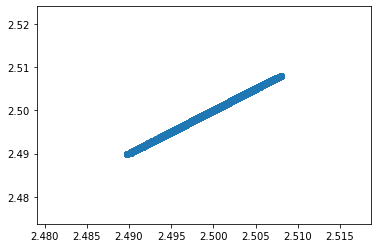

In [27]:
# Plot the residuals for the training and testing data 

plt.scatter(model.predict(X_train), model.predict(X_train))

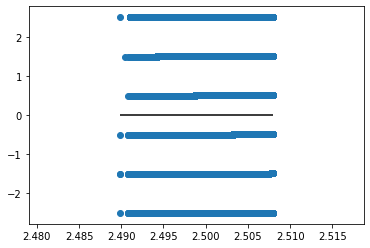

In [28]:
predictions = model.predict(X_test)
#  plot residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()